In [51]:
# Import packages as needed. Maybe PIL?
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import YAArrow

import numpy as np

import textwrap

from astropy.io import ascii

C:\Users\Michael\Anaconda\lib\site-packages\matplotlib\__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [52]:
# Just a litte function so we can graph the planets with proper relative sizes
# Output min and max are 5 and 40 respectively
def planetScaling(radius):
    return 35*(radius - 1150)/(68850) + 5

In [99]:
def angularSizeChart():

    # read in data from spread sheet
    filename = "./datatable.csv"
    datalist = ascii.read(filename, format='csv')
    
    
    area = np.pi * (10**2) 
    categoriesDict = {'Telescopes':[1,{'s':200,'marker':'h','color':"#8d00c6",'alpha':0.5}],
                      'Solar System':[2,{'s':area,"alpha":0.5,'color':'#e93500'}],
                      'Stars':[3,{'s':200,'marker':(8, 2, 45),'color':"#270584","alpha":0.75},
                               "Arrow",{'width':0.3,'frac':10**-11,'headwidth':0.7,'facecolor':"#a093c2",'alpha':0.25}],
                      'Galaxies':[4,{'s':200,'marker':(16, 2, 30),'color':"#0467ca","alpha":0.75},
                                "Arrow",{'width':0.3,'frac':10**-13,'headwidth':0.7,'facecolor':"#63a3e3",'alpha':0.25}],
                      'Extragalactic Objects':[5,{'s':200,'marker':(12, 2, 22.5),'color':"#005a03","alpha":0.75},
                                "Arrow",{'width':0.3,'frac':10**-12,'headwidth':0.7,'facecolor':"#68a56a",'alpha':0.25}]}
    
    # set up figure (hard coding more things that usual since the goal is "pretty" not reproducable)
    f, ax = plt.subplots(1,figsize=(18,12))
    f.set_facecolor('white')
    f.canvas.set_window_title("Angular Sizes")
    
    axisFont = {'fontname':'Georgia', 'size':'16'}
    titleFont = {'fontname':'Georgia', 'size':'24', 'weight':'bold'}
    annoteFont = {'fontname':'Georgia', 'size':'12'}
    
    ax.set_title("Angular Sizes",y=1.2,**titleFont)
    
    degree = '\u00b0'
    labels = ['0.0001 mas', '0.001 mas', '0.01 mas', '0.1 mas', '1 mas', '10 mas', '0.1arcsec', '1arcsec', '10arcsec', '1.6arcmin','16arcmin', '2.8'+ degree]
    
    ax.set_xscale("log")
    ax.set_xlabel("Angular Size",**axisFont)
    ax.set_xlim(10**-7,10**5)
    ax.set_xticks([10**x for x in range(-7,5)])
    ax.set_xticklabels(labels)
    #ax.set_xticklabels(ax.get_xticks(), **axisFont)
    
    ax.yaxis.grid(True)
    ax.set_ylim(0, len(categoriesDict) + 1)
    ax.set_yticks([x[0] for x in list(categoriesDict.values())]) 
    ax.set_yticklabels(list(categoriesDict.keys()),**axisFont)
    
    # putting in references (on second axis for proper labeling)
    references = datalist[np.where(datalist['Category'] == 'Reference')]
    ax2 = ax.twiny()
    ax2.set_xscale("log")
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(references['Angular Scale (arcseconds)'])
    ax2.set_xticklabels([textwrap.fill(text,15) for text in references['Name']], rotation=65,**axisFont)
    for ref in references:
        ax.axvline(ref['Angular Scale (arcseconds)'],color='#970b28',linewidth=2)
        #ax.annotate(ref['Name'], xy=(ref['Angular Scale (arcseconds)'], 0),rotation=90)
    
    
    # putting in the rest of the data
    for cat in categoriesDict.keys():
        data = datalist[np.where(datalist['Category'] == cat)]
        ax.scatter(data['Angular Scale (arcseconds)'],[categoriesDict[cat][0]]*len(data),**categoriesDict[cat][1])
        for ob in data:
            ax.annotate(ob['NickName'], (ob['Angular Scale (arcseconds)'],
                                     categoriesDict[cat][0]+ob['Offset']),**annoteFont)
        if len(categoriesDict[cat]) >= 4:
            if categoriesDict[cat][2] == 'Arrow':
                ax.add_patch(YAArrow(f, (10**-20, categoriesDict[cat][0]), 
                                    (np.max(data['Angular Scale (arcseconds)']),categoriesDict[cat][0]), 
                                    **categoriesDict[cat][3]))
    
        
    plt.tight_layout()    
    plt.savefig('angularSize.pdf')
    plt.show()


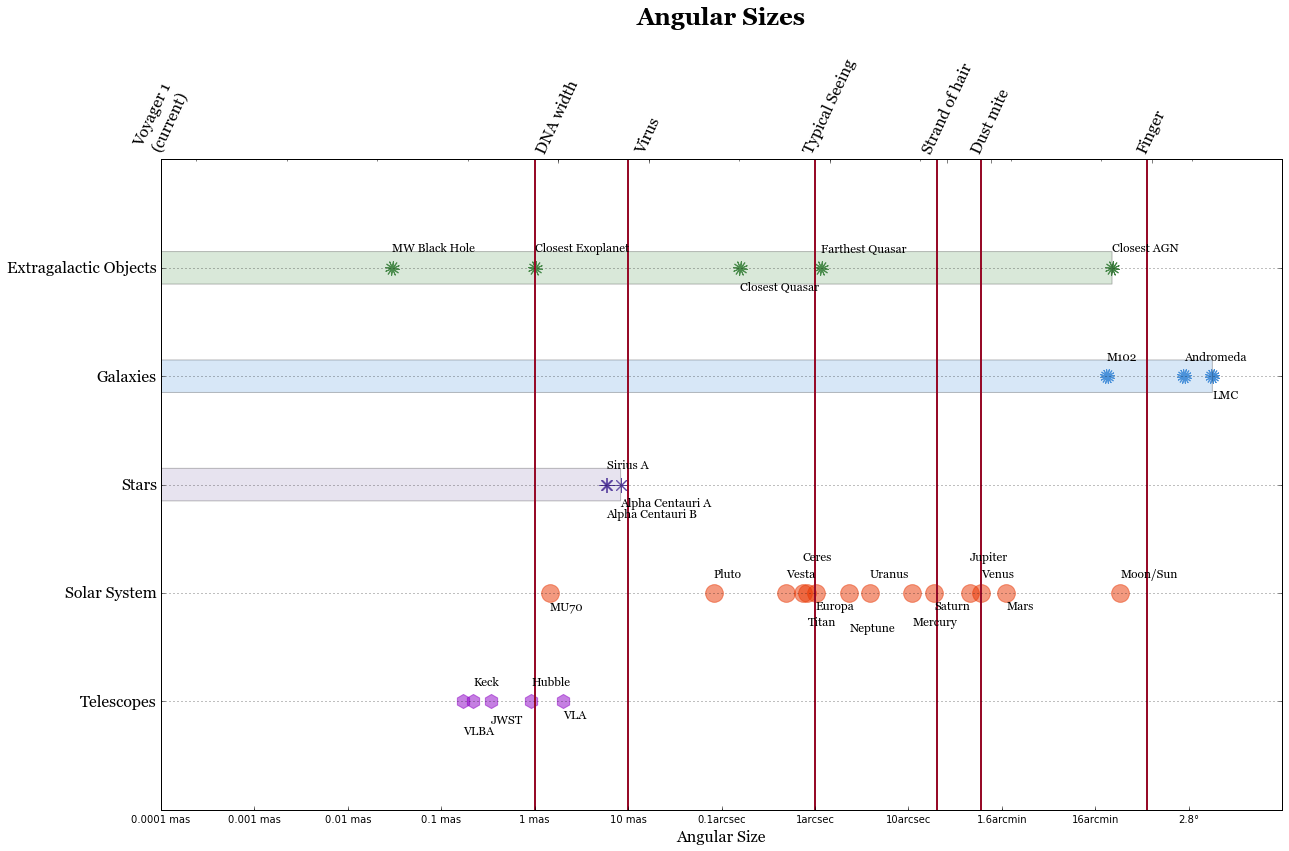

In [100]:
angularSizeChart()